In [ ]:
import pandas as pd
df=pd.read_csv("Electric_Production.csv")

In [ ]:
# cleaning data
print(df.isnull())

      DATE  IPG2211A2N
0    False       False
1    False       False
2    False       False
3    False       False
4    False       False
..     ...         ...
392  False       False
393  False       False
394  False       False
395  False       False
396  False       False

[397 rows x 2 columns]


In [ ]:
print(df.notnull())

     DATE  IPG2211A2N
0    True        True
1    True        True
2    True        True
3    True        True
4    True        True
..    ...         ...
392  True        True
393  True        True
394  True        True
395  True        True
396  True        True

[397 rows x 2 columns]


In [ ]:
print(df.isnull().sum())
### fillna, dropna 등을 통해 결측치 처리
### fillna - bfill 누락된 값을 다음 유효한 값으로 대체
### fillna - ffill 누락된 값을 가장 최근의 누락되지 않은 값으로 대체


DATE          0
IPG2211A2N    0
dtype: int64


<ipython-input-47-d7c21852cd08>:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  df_mean=df.rolling(window=12).mean()


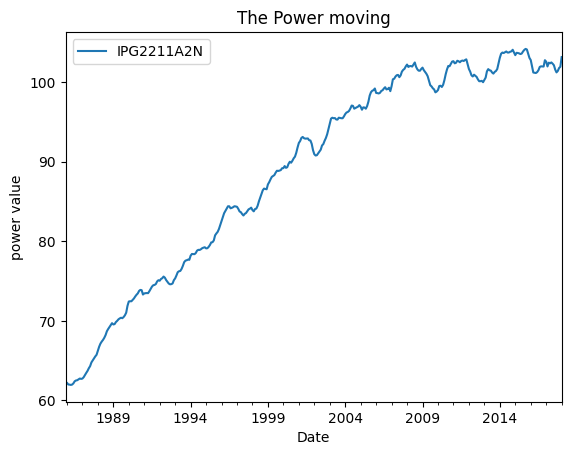

In [ ]:
## 이동 평균
## 결측치 제거 및 인덱스 설정 후 plot 그리기

import matplotlib.pyplot as plt

df_mean=df.rolling(window=12).mean()

df_mean['DATE']=pd.to_datetime(df['DATE'])
df_mean=df_mean.set_index('DATE')
df_mean=df_mean.dropna()

ax=df_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel('power value')
ax.set_title('The Power moving')

plt.show()

In [ ]:
df_mean
## 11개 데이터는 삭제

,IPG2211A2N
DATE,
1985-12-01,62.165667
1986-01-01,62.232375
1986-02-01,62.008617
1986-03-01,61.989608
1986-04-01,61.953067
...,...
2017-09-01,101.234450
2017-10-01,101.411700
2017-11-01,101.782192


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])
df=df.set_index('DATE')

In [ ]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             4,  5,  6,  7,  8,  9, 10, 11, 12,  1],
           dtype='int64', name='DATE', length=397)

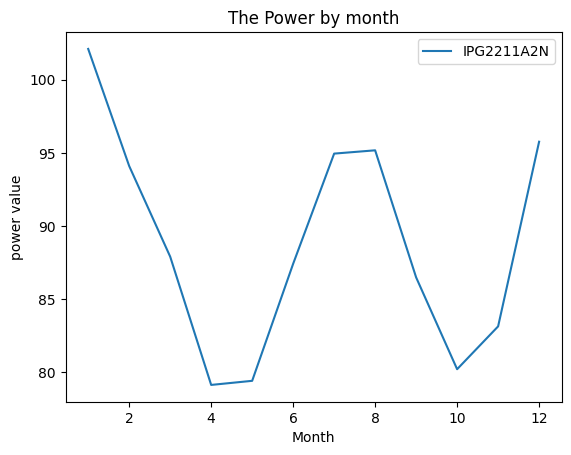

In [ ]:
index_month=df.index.month
df_month=df.groupby(index_month).mean()
ax=df_month.plot()
ax.set_xlabel('Month')
ax.set_ylabel('power value')
ax.set_title('The Power by month')
plt.legend(fontsize=10)
plt.show()

In [ ]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


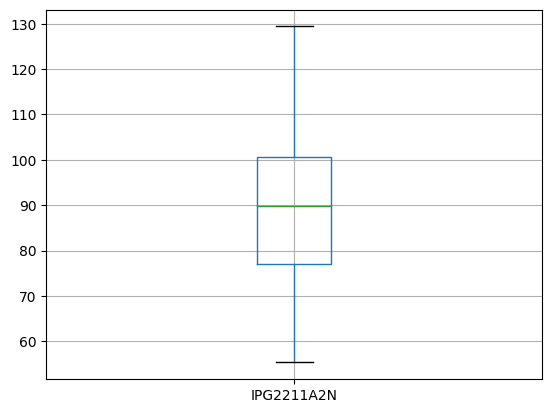

In [ ]:
ax1=df.boxplot()
plt.show()

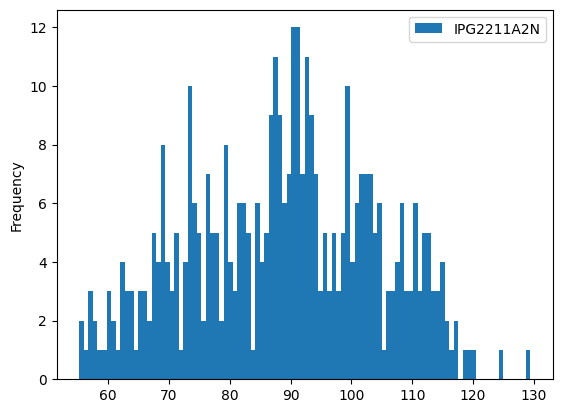

In [ ]:
ax2=df.plot(kind='hist', bins=100)
plt.show()

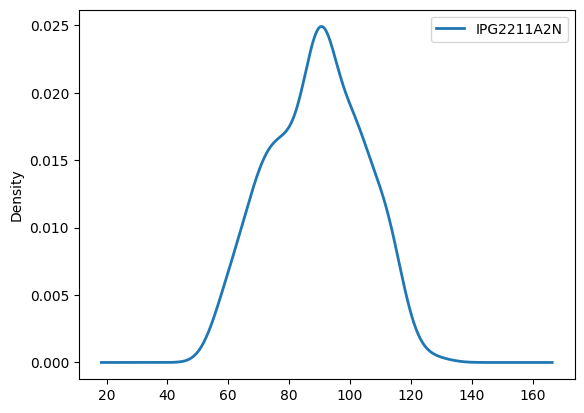

In [ ]:
ax3=df.plot(kind='density', linewidth=2)
plt.show()

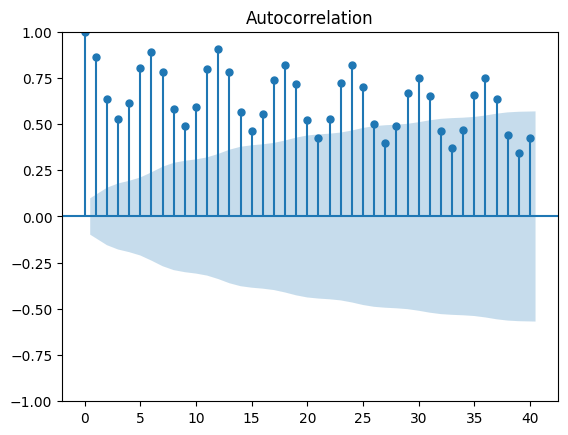

In [ ]:
from statsmodels.graphics import tsaplots
fig=tsaplots.plot_acf(df['IPG2211A2N'], lags=40)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


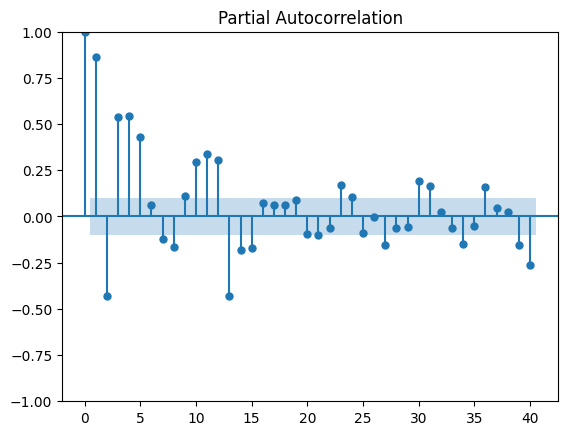

In [ ]:
fig=tsaplots.plot_pacf(df['IPG2211A2N'], lags=40)
plt.show()

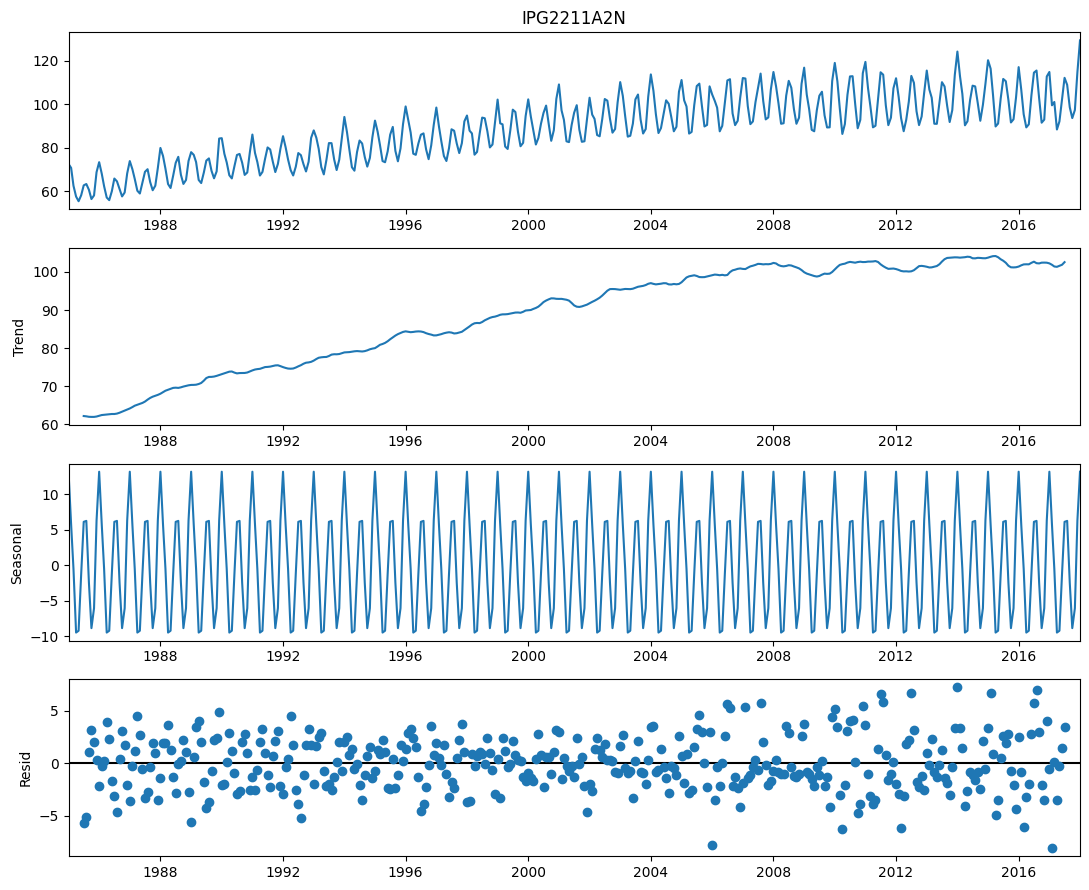

In [ ]:
# time series decomposition
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=11,9
decom=sm.tsa.seasonal_decompose(df['IPG2211A2N'])
fig=decom.plot()
plt.show()

In [ ]:
dir(decom)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [ ]:
decom.seasonal

DATE
1985-01-01    13.213039
1985-02-01     5.744747
1985-03-01    -0.493680
1985-04-01    -9.478355
1985-05-01    -9.222160
                ...    
2017-09-01    -2.447828
2017-10-01    -8.853354
2017-11-01    -6.039536
2017-12-01     6.328085
2018-01-01    13.213039
Name: seasonal, Length: 397, dtype: float64

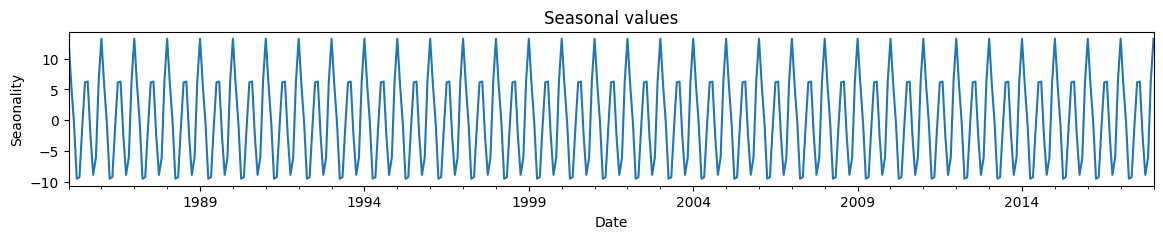

In [ ]:
decom_seasonal=decom.seasonal
ax=decom_seasonal.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Seaonality')
ax.set_title('Seasonal values')

plt.show()

In [ ]:
observed=decom.observed
trend=decom.trend
residuals=decom.resid

In [ ]:
observed

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [ ]:
trend.isnull().sum()

12

In [ ]:
residuals.isnull().sum()

12